In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('D:/MSC/SEMESTER3/TextMining/Labs/myenv/model_metrics.csv', index_col=0)

# Extract F1-scores for each model
RFC_f1 = df.loc['f1-score', ['RFC_train', 'RFC_validation', 'RFC_test']].tolist()
XGBoost_f1 = df.loc['f1-score', ['XGBoost_train', 'XGBoost_validation', 'XGBoost_test']].tolist()
CoBERTa_f1 = df.loc['f1-score', ['CoBERTa_train', 'CoBERTa_validation', 'CoBERTa_test']].tolist()

# Extract accuracy
RFC_acc = df.loc['accuracy', ['RFC_train', 'RFC_validation', 'RFC_test']].tolist()
XGBoost_acc = df.loc['accuracy', ['XGBoost_train', 'XGBoost_validation', 'XGBoost_test']].tolist()
CoBERTa_acc = df.loc['accuracy', ['CoBERTa_train', 'CoBERTa_validation', 'CoBERTa_test']].tolist()

# Extract precision
RFC_precision = df.loc['precision', ['RFC_train', 'RFC_validation', 'RFC_test']].tolist()
XGBoost_precision = df.loc['precision', ['XGBoost_train', 'XGBoost_validation', 'XGBoost_test']].tolist()
CoBERTa_precision = df.loc['precision', ['CoBERTa_train', 'CoBERTa_validation', 'CoBERTa_test']].tolist()

# Extract recall
RFC_recall = df.loc['recall', ['RFC_train', 'RFC_validation', 'RFC_test']].tolist()
XGBoost_recall = df.loc['recall', ['XGBoost_train', 'XGBoost_validation', 'XGBoost_test']].tolist()
CoBERTa_recall = df.loc['recall', ['CoBERTa_train', 'CoBERTa_validation', 'CoBERTa_test']].tolist()

# Combine all metrics into a single DataFrame
data = pd.DataFrame({
    'RFC': RFC_f1 + RFC_acc + RFC_precision + RFC_recall,
    'XGBoost': XGBoost_f1 + XGBoost_acc + XGBoost_precision + XGBoost_recall,
    'CoBERTa': CoBERTa_f1 + CoBERTa_acc + CoBERTa_precision + CoBERTa_recall
}, index=[
    'Train_f1', 'Validation_f1', 'Test_f1',
    'Train_acc', 'Validation_acc', 'Test_acc',
    'Train_precision', 'Validation_precision', 'Test_precision',
    'Train_recall', 'Validation_recall', 'Test_recall'
])

# Display the result
print(data)



                         RFC  XGBoost  CoBERTa
Train_f1              0.8785   0.9577   0.9577
Validation_f1         0.8220   0.9430   0.9430
Test_f1               0.8247   0.9435   0.9435
Train_acc             0.9219   0.9631   0.9631
Validation_acc        0.9600   0.9770   0.9770
Test_acc              0.9607   0.9773   0.9773
Train_precision       0.9534   0.9642   0.9642
Validation_precision  0.8087   0.9366   0.9366
Test_precision        0.8344   0.9393   0.9393
Train_recall          0.8146   0.9519   0.9519
Validation_recall     0.8358   0.9497   0.9497
Test_recall           0.8151   0.9479   0.9479


In [8]:
import numpy as np
import pandas as pd
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

# Perform the Friedman test
stat, p = friedmanchisquare(data['RFC'], data['XGBoost'], data['CoBERTa'])
print(f"Friedman Test Statistic: {stat}, p-value: {p}")

# Perform the Nemenyi post-hoc test
nemenyi_results = sp.posthoc_nemenyi_friedman(data.T)
print("Nemenyi post-hoc test results:")
print(nemenyi_results)

# Determine the best model based on average rank
average_ranks = data.rank(axis=1).mean()
best_model = average_ranks.idxmin()
print(f"The best model based on average rank is: {best_model}")

Friedman Test Statistic: 24.0, p-value: 6.144212353328207e-06
Nemenyi post-hoc test results:
                      Train_f1  Validation_f1   Test_f1  Train_acc  \
Train_f1              1.000000       0.914819  0.985253   1.000000   
Validation_f1         0.914819       1.000000  1.000000   0.743769   
Test_f1               0.985253       1.000000  1.000000   0.914819   
Train_acc             1.000000       0.743769  0.914819   1.000000   
Validation_acc        0.997315       0.277016  0.502213   0.999944   
Test_acc              0.971032       0.125689  0.277016   0.997315   
Train_precision       0.999944       0.502213  0.743769   1.000000   
Validation_precision  0.421218       0.999744  0.993280   0.217383   
Test_precision        0.914819       1.000000  1.000000   0.743769   
Train_recall          0.999085       0.999944  1.000000   0.985253   
Validation_recall     0.999991       0.997315  0.999944   0.999085   
Test_recall           0.985253       1.000000  1.000000   0.914819 

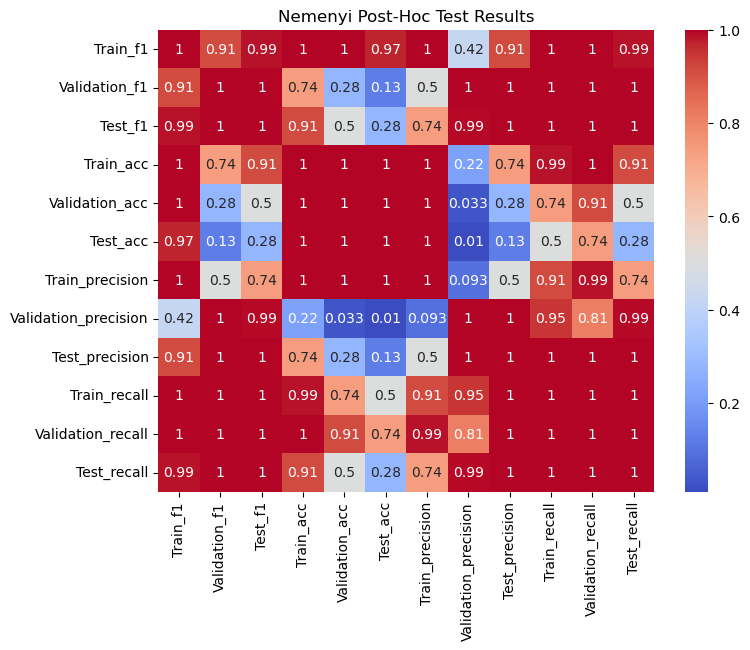

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the results
plt.figure(figsize=(8, 6))
sns.heatmap(nemenyi_results, annot=True, cmap='coolwarm', cbar=True)
plt.title('Nemenyi Post-Hoc Test Results')
plt.show()
